# Gradient Boost with no Boost models

## import libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

RANDOM_STATE=62

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Function making DataFrame

In [3]:
def make_df(n_samples=10, n_features=5, random_state=42):
    X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=random_state)
    df = pd.DataFrame(X)
    df['y_true'] = y
    return df

## Boost function

In [14]:
def boost(df, n_steps=10, learning_rate=.1, max_depth=1, plot=True):
    
    #saving trees
    trees = []
    
    #collect rmse scores for plot
    rmse_list = []
    
    #making dummy-prediction, each next tree will improve (boost) it
    df['y_pred'] = df['y_true'].mean()
    
    for i in range(n_steps):
        
        #counting residual
        df['residual'] = df['y_true'] - df['y_pred']
        model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=max_depth)
        model.fit(df.drop(['y_pred', 'y_true', 'residual'], axis=1), df['residual'])
        df['y_pred'] += learning_rate*model.predict(df.drop(['y_pred', 'y_true', 'residual'], axis=1))
        trees.append(model)
        rmse = mean_squared_error(df['y_true'], df['y_pred'])
        rmse_list.append(rmse)
        print(f' RMSE on step {i}: {rmse}')
        
    if plot==True:
        rmse_df = pd.DataFrame(data=rmse_list, columns=['RMSE'])
        return rmse_df.plot(title='RMSE decreasing step by step',
             style='o-',
             grid=True,
             figsize=(10,7));

## Enjoy =)

 RMSE on step 0: 32690.866139338086
 RMSE on step 1: 29587.752701068708
 RMSE on step 2: 27064.71157213942
 RMSE on step 3: 24908.243819925352
 RMSE on step 4: 22922.227963205372
 RMSE on step 5: 21013.753300666056
 RMSE on step 6: 19477.930805255528
 RMSE on step 7: 17973.763564540634
 RMSE on step 8: 16746.555783567255
 RMSE on step 9: 15598.786881054604
 RMSE on step 10: 14462.50999440563
 RMSE on step 11: 13376.01796180802
 RMSE on step 12: 12380.249778939236
 RMSE on step 13: 11613.870628300272
 RMSE on step 14: 10919.381412583612
 RMSE on step 15: 10178.652296032526
 RMSE on step 16: 9520.522705396608
 RMSE on step 17: 8856.289096611457
 RMSE on step 18: 8254.428601975937
 RMSE on step 19: 7710.772186129822
 RMSE on step 20: 7237.95864266516
 RMSE on step 21: 6766.990879247818
 RMSE on step 22: 6337.286668320973
 RMSE on step 23: 5917.254039623177
 RMSE on step 24: 5514.151088352756
 RMSE on step 25: 5195.891536770129
 RMSE on step 26: 4836.5994812541185
 RMSE on step 27: 4537.80

<AxesSubplot:title={'center':'RMSE decreasing step by step'}>

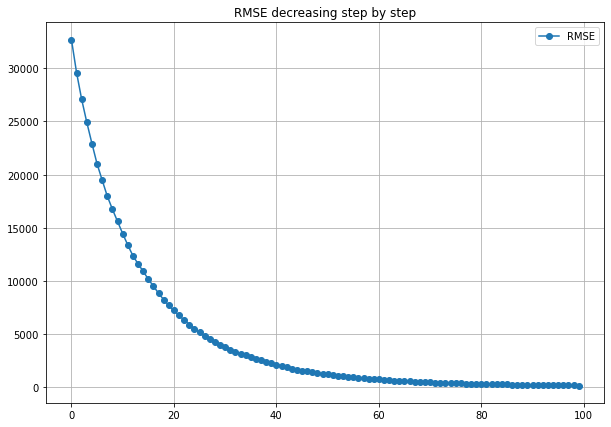

In [23]:
boost(df=make_df(n_samples=100, n_features=10), n_steps=100, learning_rate=.1, max_depth=2, plot=True)